<a href="https://colab.research.google.com/github/Rosefinch-Midsummer/Awesome-Colab/blob/master/DS/DS_Wine_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "naesaranderzhang" # username from the json file
os.environ['KAGGLE_KEY'] = "d580334ca87c88ae66a1995d318dca80" # key from the json file
#!kaggle datasets download -d iarunava/happy-house-dataset # api copied from kaggle

In [0]:
!kaggle datasets download -d zynicide/wine-reviews

wine-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!unzip wine-reviews.zip

Archive:  wine-reviews.zip
  inflating: winemag-data-130k-v2.csv  
  inflating: winemag-data-130k-v2.json  
  inflating: winemag-data_first150k.csv  


In [0]:
import pandas as pd
df=pd.read_csv("first150k.csv")  

In [0]:
!pip show pandas

Name: pandas
Version: 0.25.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: http://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: python-dateutil, pytz, numpy
Required-by: xarray, vega-datasets, statsmodels, stable-baselines, sklearn-pandas, seaborn, pymc3, pydataset, plotnine, pandas-profiling, pandas-gbq, pandas-datareader, mlxtend, mizani, magenta, gspread-dataframe, google-colab, fix-yahoo-finance, featuretools, fbprophet, fastai, cufflinks, altair


In [0]:
pandas-profiling
cufflinks
altair
featuretools

In [0]:

import pandas_profiling


pandas_profiling.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,11
Number of observations,150930
Total Missing (%),10.5%
Total size in memory,12.7 MiB
Average record size in memory,88.0 B
Numeric,3
Categorical,8
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [0]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from Oakville and was aged over three years i...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering o...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once made by his mother in this tremendously de...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, and incorporates fruit from Ponzi's Aurora...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named after the highest point in the vineyard at ...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [0]:
del  df['description']
del  df['Unnamed: 0']
df.head()

KeyError: ignored

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 11.5+ MB


In [0]:
df.tail()

,Unnamed: 0,country,designation,points,price,province,region_1,region_2,variety,winery
150925,150925,Italy,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset
150929,150929,Italy,NaN,90,15.0,Northeastern Italy,Alto Adige,NaN,Pinot Grigio,Alois Lageder


In [0]:
df.isnull().any()

Unnamed: 0     False
country         True
designation     True
points         False
price           True
province        True
region_1        True
region_2        True
variety        False
winery         False
dtype: bool

Populating the interactive namespace from numpy and matplotlib


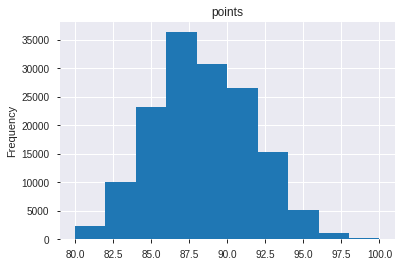

In [0]:
%pylab inline
df['points'].plot(kind='hist',title='points')

In [0]:
del df['Unnamed: 0']

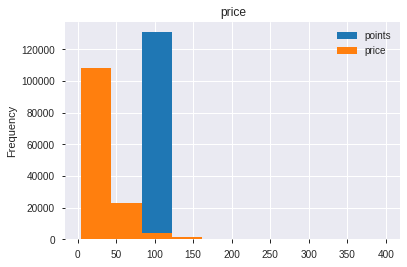

In [0]:
df[df['price']<400].plot(kind='hist',title='price')

In [0]:
df['Cost Performance']=df['points']/df['price']
df.sort_values(['Cost Performance'],ascending=False ).head(10)

,country,designation,points,price,province,region_1,region_2,variety,winery,Cost Performance
25645,US,NaN,86,4.0,California,California,California Other,Merlot,Bandit,21.50
99045,Portugal,Toutalga,86,4.0,Alentejano,NaN,NaN,Portuguese Red,Herdade dos Machados,21.50
48655,US,NaN,86,4.0,California,California,California Other,Merlot,Bandit,21.50
126595,US,NaN,86,4.0,California,California,California Other,Merlot,Bandit,21.50
80185,US,NaN,86,4.0,California,California,California Other,Merlot,Bandit,21.50
73417,Romania,UnWineD,86,4.0,Viile Timisului,NaN,NaN,Pinot Grigio,Cramele Recas,21.50
90546,Argentina,NaN,85,4.0,Mendoza Province,Mendoza,NaN,Malbec,Toca Diamonte,21.25
119295,US,NaN,84,4.0,California,California,California Other,Merlot,Bandit,21.00
91766,Argentina,Red,84,4.0,Mendoza Province,Mendoza,NaN,Malbec-Syrah,Broke Ass,21.00
34415,Spain,NaN,84,4.0,Levante,Yecla,NaN,Cabernet Sauvignon,Terrenal,21.00


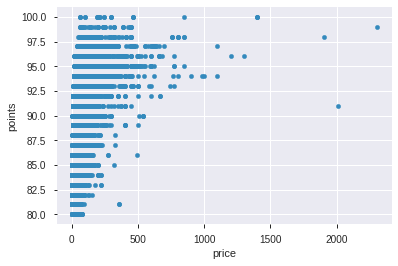

In [0]:
df.plot(kind='scatter',x='price',y='points')

In [0]:
df['country'].value_counts().head()

US        62397
Italy     23478
France    21098
Spain      8268
Chile      5816
Name: country, dtype: int64

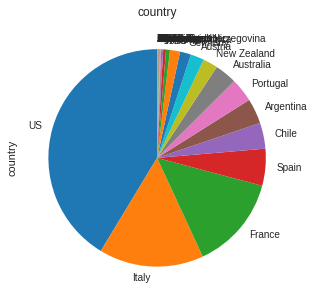

In [0]:
df['country'].value_counts().plot(kind='pie',figsize=[5,5],counterclock=True,startangle=90,legend=False,title='country')

In [0]:
df['variety'].value_counts().head()

Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
Name: variety, dtype: int64

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 462 missing from current font.
  font.set_text(s, 0, flags=flags)


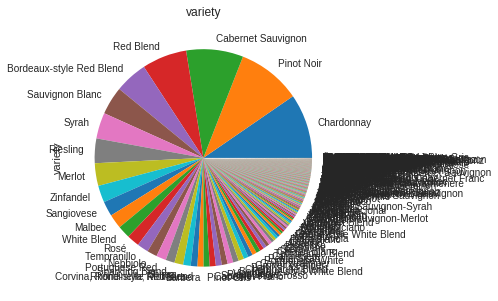

In [0]:
df['variety'].value_counts().plot(kind='pie',figsize=[5,5],counterclock=True,startangle=0,legend=False,title='variety')

In [0]:
df['winery'].value_counts().head()

Williams Selyem          374
Testarossa               274
DFJ Vinhos               258
Chateau Ste. Michelle    225
Columbia Crest           217
Name: winery, dtype: int64

In [0]:
winery_price=df['price'].groupby(df['winery']).mean()

In [0]:
win_ord=winery_price.sort_values(ascending=False).head()
win_ord

winery
Blair                            1029.000000
Château Latour                    794.400000
Masseto                           587.500000
Château Haut-Brion                569.090909
Château La Mission Haut-Brion     568.166667
Name: price, dtype: float64

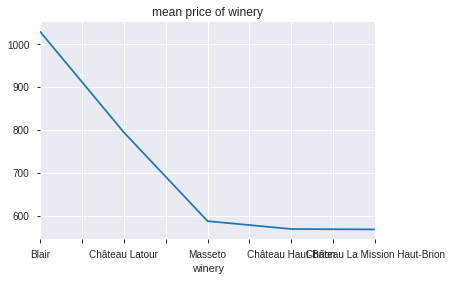

In [0]:
win_ord.plot(kind='line',title='mean price of winery')